talk about dual modality of data, 
check if there are strang trip durations
split data before finding count
.unique so that rows aren't repeated
ridge or lasso?
add comment about why start and end stations aren't the same

## Intro to Business Analytics Assignment 1

### Contributors
- Stanisław Howard, s231719
- Alexis Van den Heede, s231860
- Matthias Van Mechelen
- Sven Palac, s231799
- Salar Ravangouy Mytouei, s232038


### stuff to add after reading peer reviews:  
- yes theree are birthyears of 1880 but that doesnt make the trips irrelevant, maybe joke of teenager that put old age or something, the trips are still relevant
- Plot alexis sent Matthias about plotting the data per hour for each day, result of hist: you see a morning and evening peak on the weekdays and and no peaks in the weekends. 
- use elbow method for k means rather than just 20?
- Are there NaNs in the gender column? (one of the reports stated that: So we are dealing with just over 4 million faulty values. That means almost 25% of our dataset cannot be used for gender specific analysis.Another observation is, that we have registerd almost 12 million trips undertaken by men, while we have only abbout 1.5 million trips undertaken by women. And the vast majority of these 1.5 million trips done by women between 50 and 55 years of age.)
- Station 530 switched location 30-11-2018 (see peer review 3, but this is only one station, so maybe not worth mentioning)
- look at peer report 3, very nice initial analysis, some more relevant than other, and they top it off with an insane prediciton model. 
- Add ones to the x_train
- Transpose y values


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/Trips_2018.csv')

In [3]:
df_copy = df.copy()
df.head()

,Unnamed: 0,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
0,0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [4]:
# rerun this to save time if you make a typo and need original df again
df = df_copy.copy()

In [5]:
# col 0 is unnamed, change name to trip_id convert column to index
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.4340,2018-01-01 14:07:08.1860,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.1820,2018-01-01 15:45:33.3410,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.3370,2018-01-01 15:47:35.1720,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.3720,2018-01-01 15:45:20.1910,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.5680,2018-01-01 18:19:57.6420,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [6]:
#  convert start time and stop time to datetime objects
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,usertype,birth_year,gender
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,Subscriber,1992,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,Subscriber,1969,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,Subscriber,1956,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,Subscriber,1974,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,Subscriber,1992,1


In [7]:
# make user type dummy, get shape
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
print(df.shape)
df.head()


(17548339, 13)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber
trip_id,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1


In [8]:
# plotting coordinates
def plot_map(coords):
    plt.scatter(coords[:,0], coords[:,1], s=0.75)
    plt.ylabel('Latitude')
    plt.xlabel('Longitude')
    plt.show()

In [9]:
# get lat and long
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)



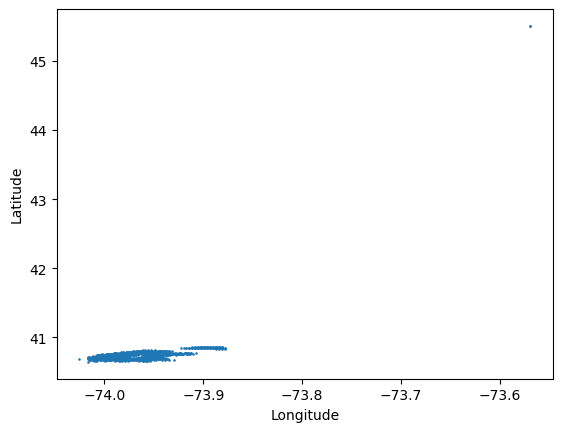

In [10]:
plot_map(coords)


Notice outlier (Canada, Montreal). quickly get rid of it to get an overview of the rest of the data. We will not yet delete the outlier datapoint from the dataframe.

In [11]:
# get rid of outlier longitude > -73.6
coords = coords[coords[:,0] < -73.6]
print(coords.shape) #shape is 917 here as it still includes the grid anomalies

(917, 2)


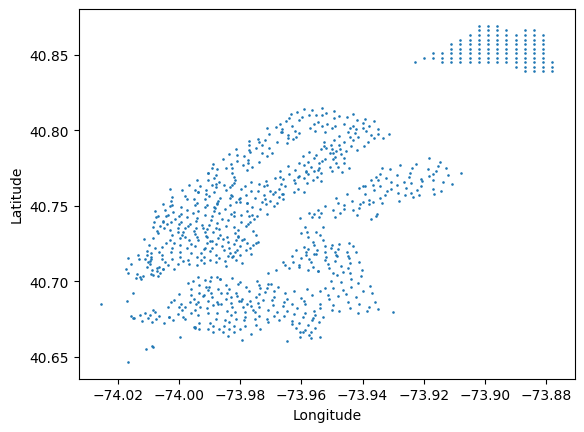

In [12]:
plot_map(coords)
# shows the unique start and end stations present in the dataset.

Notice very structured grid in top right corner. After investigation these data points were NaN's. We will rid of these data points, and at the same time we get rid of the canada outlier. 

In [13]:
# print where nan is in df, get rid of nan (= get rid of gridded outliers), create copy of df and start station coordinates
print(df.isnull().sum())
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
# get rid of Canada outlier
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
# get lat and long
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
print(coords.shape)

tripduration                  0
starttime                     0
stoptime                      0
start_station_id           2497
start_station_latitude        0
start_station_longitude       0
end_station_id             2497
end_station_latitude          0
end_station_longitude         0
bikeid                        0
birth_year                    0
gender                        0
usertype_Subscriber           0
dtype: int64
(917, 2)


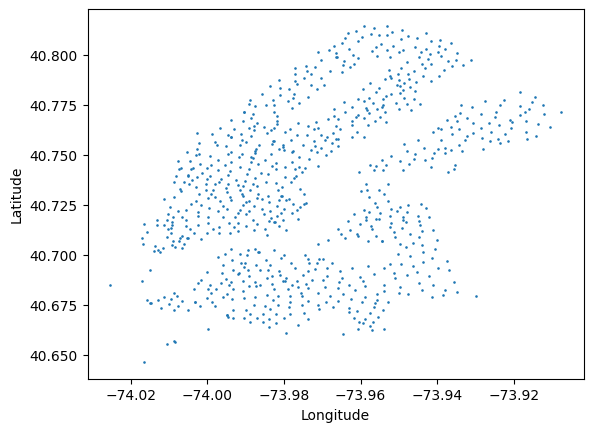

In [14]:
plot_map(coords_start)

In [15]:
# amount of distinct end stations does not match amount of start stations as seen from comparing shapes, create copy of end station coordinates.
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
print(coords_end.shape)
print(coords_start.shape)
coords_end_copy = coords_end.copy()


(849, 2)
(817, 2)


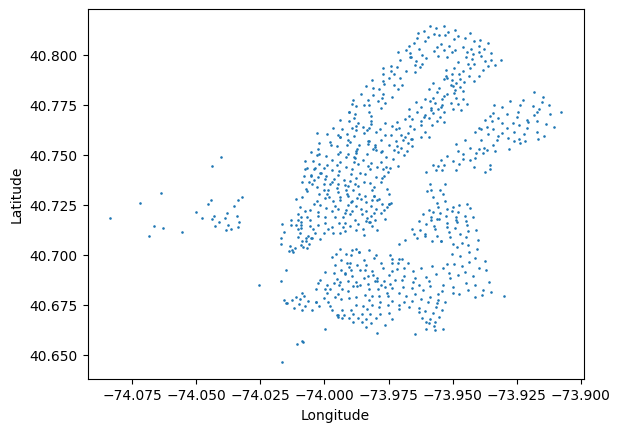

In [16]:
#what does the difference look like visually?
plot_map(coords_end)

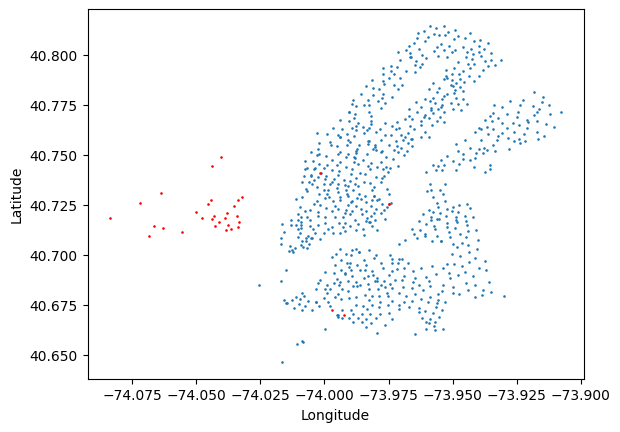

In [17]:
# highlight the end stations that are not in the start stations on the map of all en
coords_end_not_in_start = []
for i in range(len(coords_end)):
    if coords_end[i] not in coords_start:
        coords_end_not_in_start.append(coords_end[i])
coords_end_not_in_start = np.array(coords_end_not_in_start)
plt.scatter(coords_start[:,0], coords_start[:,1], s=0.75)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.scatter(coords_end_not_in_start[:,0], coords_end_not_in_start[:,1], s=0.75, c='r')
plt.show()


Since there are more end stations than start stations and all start stations are also an end station, the clustering should be done using the end stations in order to cluster every station considered in the data. 

## Part 1
Clustering the stations

In [18]:
# import kmeans
from sklearn.cluster import KMeans

In [19]:
n_clusters = 20
random_state = 0

In [20]:
# make kmeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=random_state).fit(coords_end) # using coords here instead of df to increase speed

C:\Users\Matth\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Train on coords instead of DataFrame to increase speed, then predict to save labels on df, model is trained on same data as you predict the cluster for, so the cluster they belong to will be the same one as they belonged to during convergence of the Kmeans cluster.

In [21]:
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)
df_copy2 = df.copy()


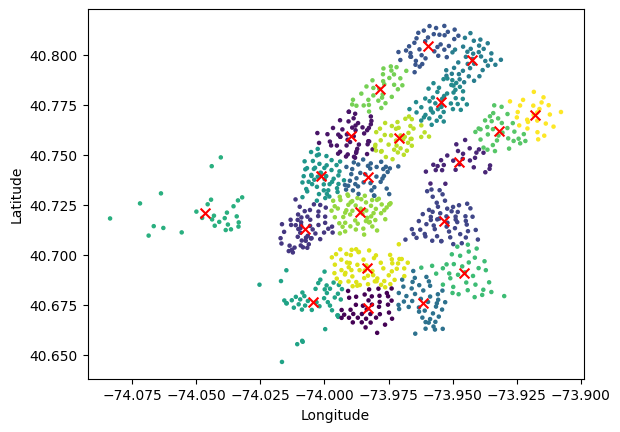

In [22]:
# plot with cluster colour & centriods
plt.scatter(coords_end[:,0], coords_end[:,1], c=kmeans.labels_, s=5)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker="x", s=50)
plt.ylabel('Latitude')
plt.xlabel('Longitude')
plt.show()

In [23]:
# run this cell for coords of starting stations and the fully edited dataframe
coords_start = coords_start_copy.copy()
coords_end = coords_end_copy.copy()
df = df_copy2.copy()
print(df.shape) # to check if no data loss, should be (17548339, 15)
df.head()


(17545760, 15)


,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,gender,usertype_Subscriber,drop_label,pick_label
trip_id,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,1
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,1
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,1
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,1
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,1,15,1


## Part 2

You can lag everything. Same reason as why you could use lags on counts in model: you know all these at moment of prediction as you only ever predict at the future moment when you have info on all the lags. So you know all lags on all other variables as well!!! This entire section rests on the assumption that you can do this, so make clear. 


We need to predict the following

In [24]:
df = df_copy2.copy()
# find n largest pick cluster, randomly chose pick label over drop label 
# made to be 20 for part 3 as we need all clusters to have models
n = 19 #cluster 12 only has arrivals, so we exclude it, otherwise it breaks our models since the departure array is empty..
largest_cluster = df['drop_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)
# get all rows with largest cluster 
df = df[df['pick_label'].isin(largest_cluster)]


Index([10, 1, 16, 6, 3, 17, 18, 4, 15, 9, 5, 0, 7, 11, 8, 13, 2, 14, 19], dtype='int32', name='drop_label')


In [25]:
# # find out what distinct genders there are
# print(df['gender'].unique())
# # for the sake of our discussion we will assume 1 = male, 2 = female, 0 = unknown. 

# #make dummies for gender, drop first to avoid multicollinearity, automatically drops the original column.
df = pd.get_dummies(df, columns=['gender'], dtype=int)

# # Usertype previously converted to dummy, if 1, then subscriber, if 0, then customer

In [26]:
df.head()

,tripduration,starttime,stoptime,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bikeid,birth_year,usertype_Subscriber,drop_label,pick_label,gender_0,gender_1,gender_2
trip_id,,,,,,,,,,,,,,,,,
0,970,2018-01-01 13:50:57.434,2018-01-01 14:07:08.186,72.0,40.767272,-73.993929,505.0,40.749013,-73.988484,31956,1992,1,1,1,0,1,0
1,723,2018-01-01 15:33:30.182,2018-01-01 15:45:33.341,72.0,40.767272,-73.993929,3255.0,40.750585,-73.994685,32536,1969,1,1,1,0,1,0
2,496,2018-01-01 15:39:18.337,2018-01-01 15:47:35.172,72.0,40.767272,-73.993929,525.0,40.755942,-74.002116,16069,1956,1,1,1,0,1,0
3,306,2018-01-01 15:40:13.372,2018-01-01 15:45:20.191,72.0,40.767272,-73.993929,447.0,40.763707,-73.985162,31781,1974,1,1,1,0,1,0
4,306,2018-01-01 18:14:51.568,2018-01-01 18:19:57.642,72.0,40.767272,-73.993929,3356.0,40.774667,-73.984706,30319,1992,1,15,1,0,1,0


In [27]:
# # 1st plot amount of predictions per hour per cluster 
# grouby_label = df.groupby(['pick_label', df['starttime'].dt.hour]).size().reset_index(name='count')
# grouby_label = grouby_label.pivot(index='starttime', columns='pick_label', values='count')
# grouby_label.plot(figsize=(20,10), legend=True)
# plt.ylabel('Count')
# plt.xlabel('Hour')
# plt.show()

Start by splitting up the dataset. Necessary because how are you going to aggregate the data by hour if each datapoint has 2 temporal parameters (start and end station times). Note that we can only use the hour and cluster as input to our model, as these are the only variables we have certain information on for the future datapoints for which we predict the demand, so we only have to copy these variables over in the new datasets. 

In [28]:
df_departures = df[['starttime', 'pick_label', 'tripduration', 'gender_0', 'gender_1', 'gender_2', 'usertype_Subscriber']].copy()
df_arrivals = df[['stoptime', 'drop_label', 'tripduration', 'gender_0', 'gender_1', 'gender_2', 'usertype_Subscriber']].copy()

# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['date'] = df[time_column].dt.date
    df['month'] = df[time_column].dt.month
    ##### df['days_from_beg_of_year'] = df[time_column].dt.dayofyear
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# function to split data into train and test set train if month < 11, test if month >= 11
def split_train_test(df):
    df_train = df[df['month'] < 11]
    df_test = df[df['month'] >= 11]
    return df_train, df_test


# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    ##### counts = df.groupby(['label', 'hour', 'day', 'month']).size().reset_index(name='count')
    ##### df = df.merge(counts, on=['label', 'hour', 'day', 'month'], how='left')
    counts = df.groupby(['label', 'hour', 'date']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour', 'date'], how='left')
    return df

# Find the average trip duration for each label, hour, date and save it in a new column
def avg_tripduration(df):
    ##### avg_tripduration = df.groupby(['label', 'hour', 'day', 'month'])['tripduration'].mean().reset_index(name='avg_tripduration')
    ##### df = df.merge(avg_tripduration, on=['label', 'hour', 'day', 'month'], how='left')
    avg_tripduration = df.groupby(['label', 'hour', 'date'])['tripduration'].mean().reset_index(name='avg_tripduration')
    df = df.merge(avg_tripduration, on=['label', 'hour', 'date'], how='left')
    return df

# Find the percentage of males, females, and unknowns for each label, hour, date and save it in a new column
def avg_gender(df):
    ##### avg_tripduration = df.groupby(['label', 'hour', 'day', 'month'])['tripduration'].mean().reset_index(name='avg_tripduration')
    ##### df = df.merge(avg_tripduration, on=['label', 'hour', 'day', 'month'], how='left')
    avg_gender = df.groupby(['label', 'hour', 'date'])['gender'].value_counts().reset_index(name='avg_tripduration')

# Split data into train and test set
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# Count the number of rows with the same label, hour, and save it in a new column
df_departures_train = count(df_departures_train)
df_departures_test = count(df_departures_test)
df_arrivals_train = count(df_arrivals_train)
df_arrivals_test = count(df_arrivals_test)


In [29]:
#drop month
df_departures_train.drop(columns=['month'], inplace=True)
df_departures_test.drop(columns=['month'], inplace=True)
df_arrivals_train.drop(columns=['month'], inplace=True)
df_arrivals_test.drop(columns=['month'], inplace=True)


# keep unique rows
df_departures_train.drop_duplicates(inplace=True)
df_departures_test.drop_duplicates(inplace=True)
df_arrivals_train.drop_duplicates(inplace=True)
df_arrivals_test.drop_duplicates(inplace=True)

# reset index
df_departures_train.reset_index(inplace=True)
df_departures_test.reset_index(inplace=True)
df_arrivals_train.reset_index(inplace=True)
df_arrivals_test.reset_index(inplace=True)

In [30]:
df_departures_train.head()

,index,label,tripduration,gender_0,gender_1,gender_2,usertype_Subscriber,hour,date,count
0,0,1,970,0,1,0,1,13,2018-01-01,40
1,1,1,723,0,1,0,1,15,2018-01-01,52
2,2,1,496,0,1,0,1,15,2018-01-01,52
3,3,1,306,0,1,0,1,15,2018-01-01,52
4,4,1,306,0,1,0,1,18,2018-01-01,44


In [31]:
df_departures_test.head()

,index,label,tripduration,gender_0,gender_1,gender_2,usertype_Subscriber,hour,date,count
0,0,19,254,0,1,0,1,0,2018-11-01,8
1,1,10,833,0,0,1,1,0,2018-11-01,88
2,2,0,683,0,1,0,1,0,2018-11-01,13
3,3,9,1840,0,1,0,1,0,2018-11-01,18
4,4,6,1212,0,1,0,1,0,2018-11-01,72


In [32]:
df_arrivals_train.head()

,index,label,tripduration,gender_0,gender_1,gender_2,usertype_Subscriber,hour,date,count
0,0,1,970,0,1,0,1,14,2018-01-01,28
1,1,1,723,0,1,0,1,15,2018-01-01,53
2,2,1,496,0,1,0,1,15,2018-01-01,53
3,3,1,306,0,1,0,1,15,2018-01-01,53
4,4,15,306,0,1,0,1,18,2018-01-01,24


In [33]:
df_arrivals_test.head()

,index,label,tripduration,gender_0,gender_1,gender_2,usertype_Subscriber,hour,date,count
0,0,16,2500911,1,0,0,0,14,2018-11-05,249
1,1,11,2303175,0,1,0,0,9,2018-11-05,16
2,2,13,2134154,1,0,0,0,7,2018-11-05,27
3,3,4,1839944,0,1,0,1,17,2018-11-02,264
4,4,16,1833553,0,1,0,0,22,2018-11-03,164


In [34]:
#check sizes 
print(df_departures_train.shape)
print(df_departures_test.shape)
print(df_arrivals_train.shape)
print(df_arrivals_test.shape)

(14302699, 10)
(2141084, 10)
(14288935, 10)
(2138145, 10)


note: days close to eachother being linked in prediction is already included in the model as you have days and months in your model. And i dont think that it matters that i split up days and months (my guess what taht the model believes the first day of each month is closely related which it isnt. But the month is also included, nevertheless it is a fair thought. Maybe it is better to include the day and month as a counter instead, this will avoid the first day of each month being related! (as yes the months differentiate them, but the first of jun is still close in dist to the first of jan in my method, while with a continuous counter this would really not be the case. Change later

In [35]:
# function to split x and y data
# def create_x_y(df):
#     x = df[['hour', 'label', 'date']]
#     y = df['count'].T
#     return x, y


In [36]:
print(largest_cluster.shape)
print(largest_cluster)

(19,)
Index([10, 1, 16, 6, 3, 17, 18, 4, 15, 9, 5, 0, 7, 11, 8, 13, 2, 14, 19], dtype='int32', name='drop_label')


In [37]:
# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # # split x and y 
    # globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    # globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    # globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    # globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])

    # # drop label from x
    # globals()['x_departures_train_{}'.format(i)].drop(columns=['label'], inplace=True)
    # globals()['x_departures_test_{}'.format(i)].drop(columns=['label'], inplace=True)
    # globals()['x_arrivals_train_{}'.format(i)].drop(columns=['label'], inplace=True)
    # globals()['x_arrivals_test_{}'.format(i)].drop(columns=['label'], inplace=True)
    

Build lagged features. 

In [38]:
def buildLaggedFeatures(s,columns, lag=24,dropna=True):
    '''
    From http://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe
    Builds a new DataFrame to facilitate regressing over all possible lagged features
    '''
    if type(s) is pd.DataFrame:
        new_dict={}
        for c in s.columns:
            new_dict[c]=s[c]
        for col_name in columns:
            new_dict[col_name]=s[col_name]
            # create lagged Series
            for l in range(1,lag+1):
                new_dict['%s_lag%d' %(col_name,l)]=s[col_name].shift(l)
        res=pd.DataFrame(new_dict,index=s.index)

    elif type(s) is pd.Series:
        the_range=range(lag+1)
        res=pd.concat([s.shift(i) for i in the_range],axis=1)
        res.columns=['lag_%d' %i for i in the_range]
    else:
        print('Only works for DataFrame or Series')
        return None
    if dropna:
        return res.dropna()
    else:
        return res 

In [39]:
#Add lag to all clusters training data:
n_lag_dep_train = 30
n_lag_arr_train = 30

for i in range(n):
    globals()['departures_train_lagged{}'.format(i)] = buildLaggedFeatures(globals()['df_departures_train_{}'.format(i)], ['count'], lag=n_lag_dep_train)
    globals()['arrivals_train_lagged{}'.format(i)] = buildLaggedFeatures(globals()['df_arrivals_train_{}'.format(i)], ['count'], lag=n_lag_arr_train)

#do same to test data
n_lag_dep_test = n_lag_dep_train  #have to be the same for models to work, as otherwise you have a model fitted to taking in 30 features and then your test has 100...
n_lag_arr_test = n_lag_arr_train

for i in range(n):
    globals()['departures_test_lagged{}'.format(i)] = buildLaggedFeatures(globals()['df_departures_test_{}'.format(i)], ['count'], lag=n_lag_dep_test)
    globals()['arrivals_test_lagged{}'.format(i)] = buildLaggedFeatures(globals()['df_arrivals_test_{}'.format(i)], ['count'], lag=n_lag_arr_test)
    

In [40]:
print(len(globals()['departures_train_lagged{}'.format(i)]))
print(len(globals()['arrivals_train_lagged{}'.format(i)]))

114770
115083


In [41]:
#unique days in departure train
print(len(globals()['departures_train_lagged{}'.format(i)]['date'].unique()))

#unique days in arrival train
print(len(globals()['arrivals_train_lagged{}'.format(i)]['date'].unique()))

#uniuque hour in departure train
print(len(globals()['departures_train_lagged{}'.format(i)]['hour'].unique()))

#uniuque hour in arrival train
print(len(globals()['arrivals_train_lagged{}'.format(i)]['hour'].unique()))

304
305
24
24


## TO DO: 
improve arrivals model, i thought adding the departures sets to the arrivals one might help, but the two sets dont have the same size, so thats something to fix i guess...


In [42]:
# #delete the days in arrivals that are not in departures
# for i in range(n):
#     globals()['arrivals_train_lagged{}'.format(i)] = globals()['arrivals_train_lagged{}'.format(i)][globals()['arrivals_train_lagged{}'.format(i)]['date'].isin(globals()['departures_train_lagged{}'.format(i)]['date'].unique())]
#     globals()['arrivals_test_lagged{}'.format(i)] = globals()['arrivals_test_lagged{}'.format(i)][globals()['arrivals_test_lagged{}'.format(i)]['date'].isin(globals()['departures_test_lagged{}'.format(i)]['date'].unique())]
#     globals()['arrivals_train_lagged{}'.format(i)].reset_index(inplace=True)
#     globals()['arrivals_test_lagged{}'.format(i)].reset_index(inplace=True)
#     globals()['arrivals_train_lagged{}'.format(i)].drop(columns=['index'], inplace=True)
#     globals()['arrivals_test_lagged{}'.format(i)].drop(columns=['index'], inplace=True)

# print(len(globals()['departures_train_lagged{}'.format(i)]))
# print(len(globals()['arrivals_train_lagged{}'.format(i)]))


In [43]:
#For all clusters training data: use np.c_ to concatenate np.ones(len(trainin_set)) with the clusters train_lagged['counts' lag_1], train lag_2, train lag_3, ... train lag_20
#aka create your x variables for all clusters training data
for i in range(n):
    globals()['x_departures_train_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['departures_train_lagged{}'.format(i)]))]
    for j in range(1, n_lag_dep_train+1):
        globals()['x_departures_train_lagged{}'.format(i)]= np.c_[globals()['x_departures_train_lagged{}'.format(i)], globals()['departures_train_lagged{}'.format(i)]['count_lag{}'.format(j)]]
    
    globals()['x_arrivals_train_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['arrivals_train_lagged{}'.format(i)]))]
    for j in range(1, n_lag_arr_train+1):
        globals()['x_arrivals_train_lagged{}'.format(i)]= np.c_[globals()['x_arrivals_train_lagged{}'.format(i)], globals()['arrivals_train_lagged{}'.format(i)]['count_lag{}'.format(j)]]
    

    # globals()['x_departures_train_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['departures_train_lagged{}'.format(i)])), 
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag1'], 
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag2'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag3'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag4'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag5'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag6'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag7'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag8'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag9'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag10'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag11'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag12'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag13'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag14'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag15'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag16'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag17'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag18'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag19'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag20'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag21'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag22'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag23'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag24'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag25'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag26'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag27'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag28'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag29'],
    #                                                         globals()['departures_train_lagged{}'.format(i)]['count_lag30']]

    # globals()['x_arrivals_train_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['arrivals_train_lagged{}'.format(i)])), 
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag1'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag2'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag3'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag4'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag5'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag6'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag7'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag8'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag9'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag10'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag11'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag12'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag13'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag14'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag15'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag16'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag17'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag18'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag19'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag20'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag21'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag22'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag23'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag24'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag25'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag26'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag27'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag28'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag29'],
    #                                                         globals()['arrivals_train_lagged{}'.format(i)]['count_lag30']]
                                                             
    

    #do same for test data
    globals()['x_departures_test_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['departures_test_lagged{}'.format(i)]))]
    for j in range(1, n_lag_dep_test+1):
        globals()['x_departures_test_lagged{}'.format(i)]= np.c_[globals()['x_departures_test_lagged{}'.format(i)], globals()['departures_test_lagged{}'.format(i)]['count_lag{}'.format(j)]]
    
    globals()['x_arrivals_test_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['arrivals_test_lagged{}'.format(i)]))]
    for j in range(1, n_lag_arr_test+1):
        globals()['x_arrivals_test_lagged{}'.format(i)]= np.c_[globals()['x_arrivals_test_lagged{}'.format(i)], globals()['arrivals_test_lagged{}'.format(i)]['count_lag{}'.format(j)]]
        

    # globals()['x_departures_test_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['departures_test_lagged{}'.format(i)])), 
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag1'], 
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag2'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag3'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag4'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag5'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag6'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag7'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag8'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag9'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag10'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag11'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag12'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag13'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag14'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag15'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag16'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag17'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag18'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag19'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag20'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag21'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag22'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag23'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag24'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag25'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag26'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag27'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag28'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag29'],
    #                                                         globals()['departures_test_lagged{}'.format(i)]['count_lag30']]
    
    # globals()['x_arrivals_test_lagged{}'.format(i)] = np.c_[np.ones(len(globals()['arrivals_test_lagged{}'.format(i)])),
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag1'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag2'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag3'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag4'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag5'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag6'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag7'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag8'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag9'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag10'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag11'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag12'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag13'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag14'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag15'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag16'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag17'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag18'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag19'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag20'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag21'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag22'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag23'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag24'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag25'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag26'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag27'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag28'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag29'],
    #                                                         globals()['arrivals_test_lagged{}'.format(i)]['count_lag30']]
    



In [44]:
# # Standerdize X data per column
# for i in range(n):
#     globals()['x_departures_train_lagged{}'.format(i)] = (globals()['x_departures_train_lagged{}'.format(i)] - globals()['x_departures_train_lagged{}'.format(i)].mean(axis=0)) / globals()['x_departures_train_lagged{}'.format(i)].std(axis=0)
#     globals()['x_departures_test_lagged{}'.format(i)] = (globals()['x_departures_test_lagged{}'.format(i)] - globals()['x_departures_test_lagged{}'.format(i)].mean(axis=0)) / globals()['x_departures_test_lagged{}'.format(i)].std(axis=0)
#     globals()['x_arrivals_train_lagged{}'.format(i)] = (globals()['x_arrivals_train_lagged{}'.format(i)] - globals()['x_arrivals_train_lagged{}'.format(i)].mean(axis=0)) / globals()['x_arrivals_train_lagged{}'.format(i)].std(axis=0)
#     globals()['x_arrivals_test_lagged{}'.format(i)] = (globals()['x_arrivals_test_lagged{}'.format(i)] - globals()['x_arrivals_test_lagged{}'.format(i)].mean(axis=0)) / globals()['x_arrivals_test_lagged{}'.format(i)].std(axis=0)

#this had terrible effects on the prediction capabilities of the models. 

In [45]:
#create y variables for all clusters training data
for i in range(n):
    globals()['y_departures_train_lagged{}'.format(i)] = np.array(globals()['departures_train_lagged{}'.format(i)]['count']).T
    globals()['y_arrivals_train_lagged{}'.format(i)] = np.array(globals()['arrivals_train_lagged{}'.format(i)]['count']).T

#do same for test data
for i in range(n):
    globals()['y_departures_test_lagged{}'.format(i)] = np.array(globals()['departures_test_lagged{}'.format(i)]['count']).T
    globals()['y_arrivals_test_lagged{}'.format(i)] = np.array(globals()['arrivals_test_lagged{}'.format(i)]['count']).T

In [46]:
x_departures_train_lagged18

array([[ 1., 27., 32., ...,  3.,  3.,  3.],
       [ 1., 14., 27., ...,  6.,  3.,  3.],
       [ 1., 21., 14., ...,  5.,  6.,  3.],
       ...,
       [ 1., 11., 11., ..., 18., 18., 18.],
       [ 1., 11., 11., ..., 18., 18., 18.],
       [ 1., 11., 11., ..., 18., 18., 18.]])

In [47]:
#fit linear model for each cluster
from sklearn.linear_model import LinearRegression
for i in range(n):
    globals()['model_departures{}'.format(i)] = LinearRegression().fit(globals()['x_departures_train_lagged{}'.format(i)], globals()['y_departures_train_lagged{}'.format(i)])
    globals()['model_arrivals{}'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_lagged{}'.format(i)], globals()['y_arrivals_train_lagged{}'.format(i)])


#predict y for all clusters test data
for i in range(n):
    globals()['y_departures_pred{}'.format(i)] = globals()['model_departures{}'.format(i)].predict(globals()['x_departures_test_lagged{}'.format(i)])
    globals()['y_arrivals_pred{}'.format(i)] = globals()['model_arrivals{}'.format(i)].predict(globals()['x_arrivals_test_lagged{}'.format(i)])

#calculate r^2 for all clusters test data
from sklearn.metrics import r2_score
for i in range(n):
    globals()['r2_departures{}'.format(i)] = r2_score(globals()['y_departures_test_lagged{}'.format(i)], globals()['y_departures_pred{}'.format(i)])
    globals()['r2_arrivals{}'.format(i)] = r2_score(globals()['y_arrivals_test_lagged{}'.format(i)], globals()['y_arrivals_pred{}'.format(i)])

#print r^2 for all clusters test data
for i in range(n):
    print('r2 departures cluster {}: {}'.format(i, globals()['r2_departures{}'.format(i)]))
    print('r2 arrivals cluster {}: {}'.format(i, globals()['r2_arrivals{}'.format(i)]))
    



r2 departures cluster 0: 0.9972333684200472
r2 arrivals cluster 0: 0.9427888951143281
r2 departures cluster 1: 0.9973209257794473
r2 arrivals cluster 1: 0.9413726987663031
r2 departures cluster 2: 0.9972089865231205
r2 arrivals cluster 2: 0.956098985910394
r2 departures cluster 3: 0.9974718216829511
r2 arrivals cluster 3: 0.9448434393087258
r2 departures cluster 4: 0.9980564671212153
r2 arrivals cluster 4: 0.9140794233510235
r2 departures cluster 5: 0.9968233165779857
r2 arrivals cluster 5: 0.9275426277717997
r2 departures cluster 6: 0.9947182754088985
r2 arrivals cluster 6: 0.9367171337042991
r2 departures cluster 7: 0.9946391022318394
r2 arrivals cluster 7: 0.9484645531822545
r2 departures cluster 8: 0.9953665389679831
r2 arrivals cluster 8: 0.9415526029088332
r2 departures cluster 9: 0.9952220213270295
r2 arrivals cluster 9: 0.9456870831455649
r2 departures cluster 10: 0.9914133589524936
r2 arrivals cluster 10: 0.9340534058119533
r2 departures cluster 11: 0.9891600627382529
r2 arriv

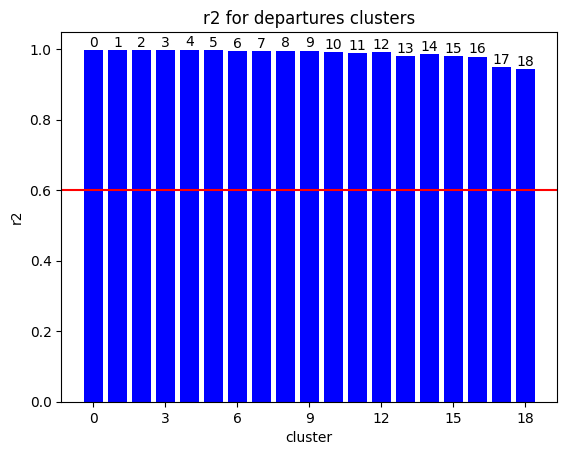

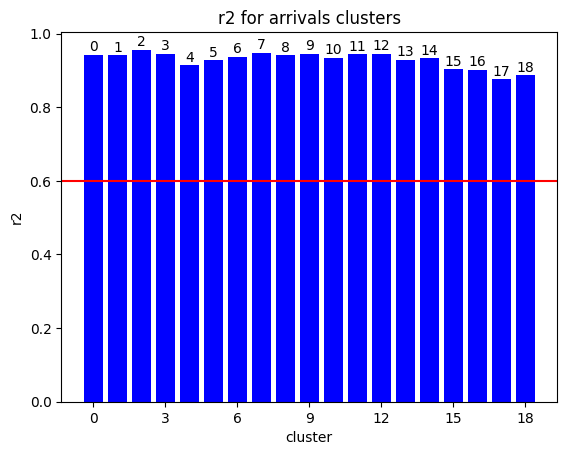

In [48]:
#put horizontal line at r^2 = 0.6, color the bars that fall below this line red
plt.bar(range(n), [globals()['r2_departures{}'.format(i)] for i in range(n)], color=['red' if globals()['r2_departures{}'.format(i)] < 0.6 else 'blue' for i in range(n)])
plt.ylabel('r2')
plt.xlabel('cluster')
plt.title('r2 for departures clusters')
#put the label of the clusters in each bin in the histogram and center it on the bin, also put it a bit higher so it doesn't overlap with the bar
for i in range(n):
    plt.text(i, globals()['r2_departures{}'.format(i)]+0.01, i, rotation=0, ha='center')
#increase whitespace between bars
plt.xticks(np.arange(0, n, step=3))
#put horizontal line at r^2 = 0.6
plt.axhline(y=0.6, color='r', linestyle='-')
plt.show()

#put horizontal line at r^2 = 0.6, color the bars that fall below this line red
plt.bar(range(n), [globals()['r2_arrivals{}'.format(i)] for i in range(n)], color=['red' if globals()['r2_arrivals{}'.format(i)] < 0.6 else 'blue' for i in range(n)])
plt.ylabel('r2')
plt.xlabel('cluster')
plt.title('r2 for arrivals clusters')
#put the label of the clusters in each bin in the histogram and center it on the bin, also put it a bit higher so it doesn't overlap with the bar
for i in range(n):
    plt.text(i, globals()['r2_arrivals{}'.format(i)]+0.01, i, rotation=0, ha='center')
#increase whitespace between bars
plt.xticks(np.arange(0, n, step=3))
#put horizontal line at r^2 = 0.6
plt.axhline(y=0.6, color='r', linestyle='-')
plt.show()


These are empty because there are no departure data for these therefore no model will be created.

In [302]:
# import XGB regressor
from sklearn.ensemble import RandomForestRegressor as XGBRegressor
from sklearn.linear_model import LinearRegression
# r^2 score
from sklearn.metrics import r2_score




In [303]:


for i in range(n):
    
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    
    globals()['reg_departures_{}'.format(i)] = XGBRegressor().fit(globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}'.format(i)] = XGBRegressor().fit(globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # save the results to variables
    globals()['y_departures_pred_{}'.format(i)] = globals()['reg_departures_{}'.format(i)].predict(globals()['x_departures_test_{}'.format(i)])
    globals()['y_arrivals_pred_{}'.format(i)] = globals()['reg_arrivals_{}'.format(i)].predict(globals()['x_arrivals_test_{}'.format(i)])

    # print r^2 score using the y_departures_pred and y_arrivals_pred
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['y_departures_pred_{}'.format(i)])))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['y_arrivals_pred_{}'.format(i)])))
    



r^2 score for departures label 8: -103.01063212489892
r^2 score for arrivals label 8: -95.39932994090275
r^2 score for departures label 5: -94.69750716837835
r^2 score for arrivals label 5: -100.04848501354799
r^2 score for departures label 0: -97.58307522010037
r^2 score for arrivals label 0: -88.8312883083732
r^2 score for departures label 9: -76.13222560439797
r^2 score for arrivals label 9: -72.83073576067895
r^2 score for departures label 2: -125.05739209077616
r^2 score for arrivals label 2: -104.8209630901356
r^2 score for departures label 13: -112.18608783820098
r^2 score for arrivals label 13: -96.203305061389
r^2 score for departures label 17: -83.68388925933037
r^2 score for arrivals label 17: -73.11342786634357
r^2 score for departures label 16: -138.99155770360315
r^2 score for arrivals label 16: -147.55776386740877
r^2 score for departures label 19: -105.10795616379909
r^2 score for arrivals label 19: -117.42968143926078
r^2 score for departures label 6: -90.6066012015627

Plotting doesn't work that well

In [251]:

# # plot in grid
# fig, axs = plt.subplots(2, n, figsize=(20,20))
# for i in range(n):
#     if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
#         print('EMPTYTTTTTYY')
#         continue
#     axs[0, i].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['y_departures_test_{}'.format(i)], s=0.75)
#     axs[0, i].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['reg_departures_{}'.format(i)].predict(globals()['x_departures_test_{}'.format(i)]), color='red')
#     axs[0, i].set_title('Departures label {}'.format(largest_cluster[i]))
#     axs[0, i].set_ylabel('Count')
#     axs[0, i].set_xlabel('Hour')
#     axs[1, i].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['y_arrivals_test_{}'.format(i)], s=0.75)
#     axs[1, i].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['reg_arrivals_{}'.format(i)].predict(globals()['x_arrivals_test_{}'.format(i)]), color='red')
#     axs[1, i].set_title('Arrivals label {}'.format(largest_cluster[i]))
#     axs[1, i].set_ylabel('Count')
#     axs[1, i].set_xlabel('Hour')

Add polynomials to increase r^2

In [297]:
# specify the degree of polynomial that aproximates the pickup data
degree = 5

In [304]:

def add_polynomial(x_data, n):
    x_data_poly = x_data.copy()
    for i in range(2, n+1):
        x_data_poly = np.concatenate((x_data_poly, np.power(x_data, i)), axis=1)
    return x_data_poly

In [305]:
print(add_polynomial(x_departures_train_0, degree).shape)

(240, 5)


In [306]:
# add polynomial features
for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], degree)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], degree)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], degree)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], degree)

# train lin reg model per label with polynomial features

for i in range(n):
    if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
        print('EMPTY')
        continue
    globals()['reg_departures_{}_poly'.format(i)] = XGBRegressor().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = XGBRegressor().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))



EMPTY
r^2 score for departures label 8: -103.01129912779624
r^2 score for arrivals label 8: -95.39932994090275
r^2 score for departures label 5: -94.69750716837835
r^2 score for arrivals label 5: -100.04848501354799
r^2 score for departures label 0: -97.58307522010037
r^2 score for arrivals label 0: -88.8312883083732
r^2 score for departures label 9: -76.13222560439797
r^2 score for arrivals label 9: -72.83073576067895
r^2 score for departures label 2: -124.76950954168487
r^2 score for arrivals label 2: -104.8209630901356
r^2 score for departures label 13: -112.18608783820098
r^2 score for arrivals label 13: -96.20794889909237
r^2 score for departures label 17: -83.70151541966715
r^2 score for arrivals label 17: -73.11342786634357
r^2 score for departures label 16: -138.99155770360315
r^2 score for arrivals label 16: -147.55776386740877
r^2 score for departures label 19: -105.10795616379909
r^2 score for arrivals label 19: -117.42968143926078
r^2 score for departures label 6: -90.60660

In [131]:
# plot
# fig, axs = plt.subplots(n, 2, figsize=(20,20))
# for i in range(n):
#     if globals()['x_departures_train_{}'.format(i)].empty or globals()['x_arrivals_train_{}'.format(i)].empty:
#         print('EMPTYYY' + str(largest_cluster[i]))
#         continue
#     axs[i, 0].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['y_departures_test_{}'.format(i)])
#     axs[i, 0].scatter(globals()['x_departures_test_{}'.format(i)][:,0], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]), color='red')
#     axs[i, 0].set_title('Departures label {}'.format(largest_cluster[i]))
#     axs[i, 0].set_ylabel('Count')
#     axs[i, 0].set_xlabel('Hour')
#     axs[i, 1].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['y_arrivals_test_{}'.format(i)])
#     axs[i, 1].scatter(globals()['x_arrivals_test_{}'.format(i)][:,0], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]), color='red')
#     axs[i, 1].set_title('Arrivals label {}'.format(largest_cluster[i]))
#     axs[i, 1].set_ylabel('Count')
#     axs[i, 1].set_xlabel('Hour')



Add lag to increase r^2 

In [39]:
# lag features
def add_lag_features(df, n):
    df_lag = df.copy()
    for i in range(1, n+1):
        df_lag['lag_{}'.format(i)] = df_lag['count'].shift(i)
    df_lag.dropna(inplace=True)
    return df_lag

In [40]:
# add 3 lag features
for i in range(n):
    globals()['df_departures_train_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_train_{}'.format(i)], 3)
    globals()['df_departures_test_{}_lag'.format(i)] = add_lag_features(globals()['df_departures_test_{}'.format(i)], 3)
    globals()['df_arrivals_train_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_train_{}'.format(i)], 3)
    globals()['df_arrivals_test_{}_lag'.format(i)] = add_lag_features(globals()['df_arrivals_test_{}'.format(i)], 3)

In [41]:
# split x and y data
for i in range(n):
    globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)] = create_x_y(globals()['df_departures_train_{}_lag'.format(i)])
    globals()['x_departures_test_{}_lag'.format(i)], globals()['y_departures_test_{}_lag'.format(i)] = create_x_y(globals()['df_departures_test_{}_lag'.format(i)])
    globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_train_{}_lag'.format(i)])
    globals()['x_arrivals_test_{}_lag'.format(i)], globals()['y_arrivals_test_{}_lag'.format(i)] = create_x_y(globals()['df_arrivals_test_{}_lag'.format(i)])

# add poly 6 features
for i in range(n):
    globals()['x_departures_train_{}_lag'.format(i)] = add_polynomial(globals()['x_departures_train_{}_lag'.format(i)], 6)
    globals()['x_departures_test_{}_lag'.format(i)] = add_polynomial(globals()['x_departures_test_{}_lag'.format(i)], 6)
    globals()['x_arrivals_train_{}_lag'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}_lag'.format(i)], 6)
    globals()['x_arrivals_test_{}_lag'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}_lag'.format(i)], 6)

# train lin reg model per label with lag features
for i in range(n):
    globals()['reg_departures_{}_lag'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
    globals()['reg_arrivals_{}_lag'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['reg_departures_{}_lag'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['reg_arrivals_{}_lag'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]))))


In [42]:
# plot
fig, axs = plt.subplots(2, n, figsize=(20,10))
for i in range(n):
    axs[0, i].scatter(globals()['x_departures_test_{}_lag'.format(i)][:,0], globals()['y_departures_test_{}_lag'.format(i)], s=1)
    axs[0, i].scatter(globals()['x_departures_test_{}_lag'.format(i)][:,0], globals()['reg_departures_{}_lag'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]), color='red')
    axs[0, i].set_title('Departures label {}'.format(largest_cluster[i]))
    axs[0, i].set_ylabel('Count')
    axs[0, i].set_xlabel('Hour')
    axs[1, i].scatter(globals()['x_arrivals_test_{}_lag'.format(i)][:,0], globals()['y_arrivals_test_{}_lag'.format(i)], s=1)
    axs[1, i].scatter(globals()['x_arrivals_test_{}_lag'.format(i)][:,0], globals()['reg_arrivals_{}_lag'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]), color='red')
    axs[1, i].set_title('Arrivals label {}'.format(largest_cluster[i]))
    axs[1, i].set_ylabel('Count')
    axs[1, i].set_xlabel('Hour')


Lag doesn't really help so shouldn't include

In [43]:
# make random forest model
# from sklearn.ensemble import RandomForestRegressor

# # train random forest model per label with lag features
# for i in range(n):
#     globals()['reg_departures_{}_lag_rf'.format(i)] = RandomForestRegressor().fit(globals()['x_departures_train_{}_lag'.format(i)], globals()['y_departures_train_{}_lag'.format(i)])
#     globals()['reg_arrivals_{}_lag_rf'.format(i)] = RandomForestRegressor().fit(globals()['x_arrivals_train_{}_lag'.format(i)], globals()['y_arrivals_train_{}_lag'.format(i)])

#     # print r^2 score
#     print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}_lag'.format(i)], globals()['reg_departures_{}_lag_rf'.format(i)].predict(globals()['x_departures_test_{}_lag'.format(i)]))))
#     print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}_lag'.format(i)], globals()['reg_arrivals_{}_lag_rf'.format(i)].predict(globals()['x_arrivals_test_{}_lag'.format(i)]))))

## Part 3



In [44]:
df = df_copy2.copy()

#do same manipulations on df as done previously for the 5 largest clusters, but this time for all clusters
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()


# rename label columns
df_departures.rename(columns={'pick_label':'label'}, inplace=True)
df_arrivals.rename(columns={'drop_label':'label'}, inplace=True)

# Extract date and time components
def extract_date_time_components(df, time_column):
    df['hour'] = df[time_column].dt.hour
    df['day'] = df[time_column].dt.day
    df['month'] = df[time_column].dt.month
    df.drop(columns=[time_column], inplace=True)

extract_date_time_components(df_departures, 'starttime')
extract_date_time_components(df_arrivals, 'stoptime')

# Remove trip_id index
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

# Count the number of rows with the same label, hour, and save it in a new column
def count(df):
    counts = df.groupby(['label', 'hour']).size().reset_index(name='count')
    df = df.merge(counts, on=['label', 'hour'], how='left')
    return df
df_departures = count(df_departures)
df_arrivals = count(df_arrivals)

df_departures_copy = df_departures.copy()
df_arrivals_copy = df_arrivals.copy()

KeyboardInterrupt: 

In [ ]:
#check we have included all clusters
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))



notice that cluster 12 is the group of red outliers in the map of all end stations, apparently this cluster only has arrivals and no departures. As a consequence, no bikes have to be moved to stations within this cluster, and the cluster can be ignored for this section. 

In [ ]:
df_departures = df_departures[df_departures['label'] != 12]
df_arrivals = df_arrivals[df_arrivals['label'] != 12]
print(np.sort(df_arrivals.label.unique()))
print(np.sort(df_departures.label.unique()))

Similarly to the method presented in the previous section, we will train prediction models to predict he change in arrivals and departures over the course of time. This time, however, models for all the relevant clusters will have to be trained. The method will be similar however. 

In [ ]:
# include all relevant clusters
n = 19

# redifine largest cluster
largest_cluster = df['pick_label'].value_counts().nlargest(n).index[:n]
print(largest_cluster)

# split data
df_departures_train, df_departures_test = split_train_test(df_departures)
df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# split data per label for n
for i in range(n):
    globals()['df_departures_train_{}'.format(i)] = df_departures_train[df_departures_train['label'] == largest_cluster[i]]
    globals()['df_departures_test_{}'.format(i)] = df_departures_test[df_departures_test['label'] == largest_cluster[i]]
    globals()['df_arrivals_train_{}'.format(i)] = df_arrivals_train[df_arrivals_train['label'] == largest_cluster[i]]
    globals()['df_arrivals_test_{}'.format(i)] = df_arrivals_test[df_arrivals_test['label'] == largest_cluster[i]]

    # split x and y 
    globals()['x_departures_train_{}'.format(i)], globals()['y_departures_train_{}'.format(i)] = create_x_y(globals()['df_departures_train_{}'.format(i)])
    globals()['x_departures_test_{}'.format(i)], globals()['y_departures_test_{}'.format(i)] = create_x_y(globals()['df_departures_test_{}'.format(i)])
    globals()['x_arrivals_train_{}'.format(i)], globals()['y_arrivals_train_{}'.format(i)] = create_x_y(globals()['df_arrivals_train_{}'.format(i)])
    globals()['x_arrivals_test_{}'.format(i)], globals()['y_arrivals_test_{}'.format(i)] = create_x_y(globals()['df_arrivals_test_{}'.format(i)])

In [ ]:
# add polynomial features
n_poly = 10
for i in range(n):
    globals()['x_departures_train_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_train_{}'.format(i)], n_poly)
    globals()['x_departures_test_{}_poly'.format(i)] = add_polynomial(globals()['x_departures_test_{}'.format(i)], n_poly)
    globals()['x_arrivals_train_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_train_{}'.format(i)], n_poly)
    globals()['x_arrivals_test_{}_poly'.format(i)] = add_polynomial(globals()['x_arrivals_test_{}'.format(i)], n_poly)

# train lin reg model per label with polynomial features
for i in range(n):
    globals()['reg_departures_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_departures_train_{}_poly'.format(i)], globals()['y_departures_train_{}'.format(i)])
    globals()['reg_arrivals_{}_poly'.format(i)] = LinearRegression().fit(globals()['x_arrivals_train_{}_poly'.format(i)], globals()['y_arrivals_train_{}'.format(i)])

    # print r^2 score
    print('r^2 score for departures label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_departures_test_{}'.format(i)], globals()['reg_departures_{}_poly'.format(i)].predict(globals()['x_departures_test_{}_poly'.format(i)]))))
    print('r^2 score for arrivals label {}: {}'.format(largest_cluster[i], r2_score(globals()['y_arrivals_test_{}'.format(i)], globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['x_arrivals_test_{}_poly'.format(i)]))))

In [ ]:
#create a dataframe with new data from january 2019 to variable month, take march 2019 for now, for predicions in the future. 
df_arrivals_future = df_arrivals_copy.copy()
df_departures_future = df_departures_copy.copy()

#remove cluster 12 for same reasons as before
df_arrivals_future = df_arrivals_future[df_arrivals_future['label'] != 12]
df_departures_future = df_departures_future[df_departures_future['label'] != 12]
print(np.sort(df_arrivals_future.label.unique()))
print(np.sort(df_departures_future.label.unique()))

# define amount of months you want to look ahead from jan 2019. 
month_end = 3
df_arrivals_future = df_arrivals_future[df_arrivals_future['month'] <= month_end]
df_departures_future = df_departures_future[df_departures_future['month'] <= month_end]

#get rid of the counts column for the future data, as we will be predicting this
df_arrivals_future.drop(columns=['count'], inplace=True)
df_departures_future.drop(columns=['count'], inplace=True)

#get rid of month column as it is not needed (similarly as before)
df_arrivals_future.drop(columns=['month'], inplace=True)
df_departures_future.drop(columns=['month'], inplace=True)

# split data per label for n
for i in range(n):
    globals()['df_departures_future_{}'.format(i)] = df_departures_future[df_departures_future['label'] == largest_cluster[i]]
    globals()['df_arrivals_future_{}'.format(i)] = df_arrivals_future[df_arrivals_future['label'] == largest_cluster[i]]

#add as many polynomial features as we did for the training data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)] = add_polynomial(globals()['df_departures_future_{}'.format(i)], n_poly)
    globals()['df_arrivals_future_{}_poly'.format(i)] = add_polynomial(globals()['df_arrivals_future_{}'.format(i)], n_poly)


In [ ]:
# predict future data
for i in range(n):
    globals()['df_departures_future_{}_poly'.format(i)]['count'] = globals()['reg_departures_{}_poly'.format(i)].predict(globals()['df_departures_future_{}_poly'.format(i)])
    globals()['df_arrivals_future_{}_poly'.format(i)]['count'] = globals()['reg_arrivals_{}_poly'.format(i)].predict(globals()['df_arrivals_future_{}_poly'.format(i)])

# compute the difference between the predicted arrivals and the predicted departures for each cluster per hour and store in new dataframe
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)]['difference'] = globals()['df_arrivals_future_{}_poly'.format(i)]['count'] - globals()['df_departures_future_{}_poly'.format(i)]['count']

# sum the differences per hour for a specific cluster per day
for i in range(n):
    globals()['df_arrivals_future_{}_poly'.format(i)] = globals()['df_arrivals_future_{}_poly'.format(i)].groupby(['label', 'day']).sum().reset_index()

# print per day for a specific cluster the difference between predicted arrivals and predicted departures
for i in range(n):
    print(globals()['df_arrivals_future_{}_poly'.format(i)].head())
    

# sum 

In [ ]:
# if we ever want to predict for multiple years ahead, we can use this, but then we also need to include the year in our model to distinguish between the inputs
# month_end = 3
# if month_end > 12:
#     years = month_end // 12
#     month_end = month_end % 12
# for i in range(years):
#     df_arrivals_future = df_arrivals_future.append(df_arrivals_copy)
#     df_departures_future = df_departures_future.append(df_departures_copy)

# df_arrivals_future = df_arrivals_future.append(df_arrivals_copy[['month'] <= month_end])
# df_departures_future = df_departures_future.append(df_departures_copy[['month'] <= month_end])

## Exploratory part 

1) What is your research question?
    - Can the addition of NY daily weather data in combination with a  increase prediction accuracy?

<br>

2) Which data are you planning to use and from where are you planning to get it?
    - We will use both the trips_2018.csv file provided by the course instructors and a self-gathered dataset containing the 2018 daily weather data in NYC, with the assumption that the weather at Central Park is representative of the weather in the entire spatial scope of the bike stations included in the dataset. A link to the data can be found [here](https://www.weather.gov/wrh/climate?wfo=okx)

<br>

3) Which methods are you planning to use?
    - We will attempt to use multiple Neural Networks, the final choice being the best performing one. 

<br>

4) Which benchmark are you going to use? 
    - The benchmark will be the performance of the prediction model introduced in Part 2 of the mandatory assignment. 

<br>

5) Which metrics and methods are you planning for validation? 
    - The R^2 value of the predictions. 

In [1]:
#clear all variables for memory overflow reasons
%reset -f

# #reset python kernel
# import IPython
# app = IPython.Application.instance()
# app.kernel.do_shutdown(True)


#import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# redefine all variables you actually need. from scratch. This follows the same code as before, so can be negected. 
df = pd.read_csv('data/Trips_2018.csv')
df.rename(columns={'Unnamed: 0':'trip_id'}, inplace=True)
df.set_index('trip_id', inplace=True)
df['starttime'] = pd.to_datetime(df['starttime'], format="%Y-%m-%d %H:%M:%S.%f")
df['stoptime'] = pd.to_datetime(df['stoptime'], format="%Y-%m-%d %H:%M:%S.%f")
df = pd.get_dummies(df, columns=['usertype'], dtype=int, drop_first=True)
coords = df[['start_station_longitude','start_station_latitude']].values
coords = np.unique(coords, axis=0)
coords = coords[coords[:,0] < -73.6]
df = df[~np.isnan(df['start_station_id'])]
df = df[~np.isnan(df['end_station_id'])]
df = df[df['start_station_longitude'] < -73.6]
df = df[df['end_station_longitude'] < -73.6]
coords_start = df[['start_station_longitude','start_station_latitude']].values
coords_start = np.unique(coords_start, axis=0)
coords_start_copy = coords_start.copy()
coords_end = df[['end_station_longitude','end_station_latitude']].values
coords_end = np.unique(coords_end, axis=0)
n_clusters = 20
kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(coords_end)
df['drop_label'] = kmeans.predict(df[['end_station_longitude','end_station_latitude']].values)
df['pick_label'] = kmeans.predict(df[['start_station_longitude','start_station_latitude']].values)



C:\Users\Matth\AppData\Roaming\Python\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
#split dataframe
df_departures = df[['starttime', 'pick_label']].copy()
df_arrivals = df[['stoptime', 'drop_label']].copy()

In [3]:
#split starttime into date y-m-d and time h-m-s
df_departures['Date'] = df_departures['starttime'].dt.date
df_departures['Time'] = df_departures['starttime'].dt.time
df_arrivals['Date'] = df_arrivals['stoptime'].dt.date
df_arrivals['Time'] = df_arrivals['stoptime'].dt.time

#drop starttime and stoptime columns
df_departures.drop(columns=['starttime'], inplace=True)
df_arrivals.drop(columns=['stoptime'], inplace=True)

#convert date to datetime object
df_departures['Date'] = pd.to_datetime(df_departures['Date'], format="%Y-%m-%d")
df_arrivals['Date'] = pd.to_datetime(df_arrivals['Date'], format="%Y-%m-%d")


In [4]:
#open weather data 2018, read textfile and convert to dataframe
text = open('data/2018_weather_data.txt', 'r')
weather_data = text.read()
weather_data = weather_data.split('\n')
weather_data = [i.split('\t') for i in weather_data[1:]]
print(weather_data)
weather_data = pd.DataFrame(weather_data)
weather_data.columns = ['Date', 'Max_temp', 'Min_temp', 'Avg_temp', 'Departure_temp', 'HDD', 'CDD', 'Precipitation', 'Snowfall', 'Snow_depth']
weather_data.head()

#change date column to datetime object
weather_data['Date'] = pd.to_datetime(weather_data['Date'], format="%Y-%m-%d")
weather_data.head()


[['2018-01-01', '19', '7', '13.0', '-22.2', '52', '0', '0.00', '0.0', 'T'], ['2018-01-02', '26', '13', '19.5', '-15.5', '45', '0', '0.00', '0.0', '0'], ['2018-01-03', '30', '16', '23.0', '-11.8', '42', '0', '0.00', '0.0', 'T'], ['2018-01-04', '29', '19', '24.0', '-10.7', '41', '0', '0.76', '9.8', '1'], ['2018-01-05', '19', '9', '14.0', '-20.5', '51', '0', '0.00', '0.0', '7'], ['2018-01-06', '13', '6', '9.5', '-24.9', '55', '0', '0.00', '0.0', '6'], ['2018-01-07', '18', '5', '11.5', '-22.7', '53', '0', '0.00', '0.0', '6'], ['2018-01-08', '31', '17', '24.0', '-10.1', '41', '0', '0.01', 'T', '5'], ['2018-01-09', '44', '30', '37.0', '3.1', '28', '0', '0.00', '0.0', '5'], ['2018-01-10', '43', '30', '36.5', '2.7', '28', '0', '0.00', '0.0', '4'], ['2018-01-11', '53', '41', '47.0', '13.3', '18', '0', '0.00', '0.0', '3'], ['2018-01-12', '61', '44', '52.5', '18.9', '12', '0', '0.54', '0.0', 'T'], ['2018-01-13', '58', '19', '38.5', '5.0', '26', '0', '0.05', '0.0', '0'], ['2018-01-14', '25', '15',

,Date,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth
0,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T
1,2018-01-02,26,13,19.5,-15.5,45,0,0.00,0.0,0
2,2018-01-03,30,16,23.0,-11.8,42,0,0.00,0.0,T
3,2018-01-04,29,19,24.0,-10.7,41,0,0.76,9.8,1
4,2018-01-05,19,9,14.0,-20.5,51,0,0.00,0.0,7


In [5]:
df_departures.head()

,pick_label,Date,Time
trip_id,,,
0,1,2018-01-01,13:50:57.434000
1,1,2018-01-01,15:33:30.182000
2,1,2018-01-01,15:39:18.337000
3,1,2018-01-01,15:40:13.372000
4,1,2018-01-01,18:14:51.568000


In [6]:
#merge weather data with our dataframe based on date
df_departures = df_departures.merge(weather_data, left_on='Date', right_on='Date', how='left')
df_arrivals = df_arrivals.merge(weather_data, left_on='Date', right_on='Date', how='left')

In [7]:
df_departures.head()

,pick_label,Date,Time,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth
0,1,2018-01-01,13:50:57.434000,19,7,13.0,-22.2,52,0,0.00,0.0,T
1,1,2018-01-01,15:33:30.182000,19,7,13.0,-22.2,52,0,0.00,0.0,T
2,1,2018-01-01,15:39:18.337000,19,7,13.0,-22.2,52,0,0.00,0.0,T
3,1,2018-01-01,15:40:13.372000,19,7,13.0,-22.2,52,0,0.00,0.0,T
4,1,2018-01-01,18:14:51.568000,19,7,13.0,-22.2,52,0,0.00,0.0,T


In [8]:
df_arrivals.head()

,drop_label,Date,Time,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth
0,1,2018-01-01,14:07:08.186000,19,7,13.0,-22.2,52,0,0.00,0.0,T
1,1,2018-01-01,15:45:33.341000,19,7,13.0,-22.2,52,0,0.00,0.0,T
2,1,2018-01-01,15:47:35.172000,19,7,13.0,-22.2,52,0,0.00,0.0,T
3,1,2018-01-01,15:45:20.191000,19,7,13.0,-22.2,52,0,0.00,0.0,T
4,15,2018-01-01,18:19:57.642000,19,7,13.0,-22.2,52,0,0.00,0.0,T


In [9]:
# sort data based on date and time
# df_departures.sort_values(by=['Date', 'Time'], inplace=True)
# df_arrivals.sort_values(by=['Date', 'Time'], inplace=True)
# not necessary

#add month of each data entry in new column
df_departures['month'] = df_departures['Date'].dt.month
df_arrivals['month'] = df_arrivals['Date'].dt.month

In [10]:
df_departures.head()

,pick_label,Date,Time,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth,month
0,1,2018-01-01,13:50:57.434000,19,7,13.0,-22.2,52,0,0.00,0.0,T,1
1,1,2018-01-01,15:33:30.182000,19,7,13.0,-22.2,52,0,0.00,0.0,T,1
2,1,2018-01-01,15:39:18.337000,19,7,13.0,-22.2,52,0,0.00,0.0,T,1
3,1,2018-01-01,15:40:13.372000,19,7,13.0,-22.2,52,0,0.00,0.0,T,1
4,1,2018-01-01,18:14:51.568000,19,7,13.0,-22.2,52,0,0.00,0.0,T,1


In [11]:
#create new column with the hour of the day
df_departures['hour'] = df_departures['Time'].apply(lambda x: x.hour)
df_arrivals['hour'] = df_arrivals['Time'].apply(lambda x: x.hour)

#create a new column with the day since the start of the year
df_departures['day'] = df_departures['Date'].apply(lambda x: x.dayofyear)
df_arrivals['day'] = df_arrivals['Date'].apply(lambda x: x.dayofyear)

#drop time columns
df_departures.drop(columns=['Time'], inplace=True)
df_arrivals.drop(columns=['Time'], inplace=True)

#get rid of index as it has no real meaning. 
df_departures.reset_index(drop=True, inplace=True)
df_arrivals.reset_index(drop=True, inplace=True)

In [12]:
df_departures.head()
print(df_departures.shape)


(17545760, 14)


In [13]:
#group data per hour and sum the counts, add new column with the sum
counts = df_departures.groupby(['hour', 'day', 'pick_label']).size().reset_index(name='count')
df_departures = df_departures.merge(counts, on=['hour', 'day', 'pick_label'], how='left')
counts = df_arrivals.groupby(['hour', 'day', 'drop_label']).size().reset_index(name='count')
df_arrivals = df_arrivals.merge(counts, on=['hour', 'day', 'drop_label'], how='left')



In [14]:
df_departures.head()

,pick_label,Date,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth,month,hour,day,count
0,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,13,1,40
1,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,52
2,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,52
3,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,52
4,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,18,1,44


In [15]:
df_arrivals.head()

,drop_label,Date,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth,month,hour,day,count
0,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,14,1,28
1,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,53
2,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,53
3,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,53
4,15,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,18,1,24


In [16]:
# Get rid of duplicates (ghosts of grouby function, no clue where they come from)
df_departures.drop_duplicates(inplace=True)
df_arrivals.drop_duplicates(inplace=True)

In [17]:
# Do some sanity checks: 
print("Shape of dataset: ",df_departures.shape)
print("Number of unique days: ",len(df_departures['Date'].unique()))
print("Number of unique hours: ",len(df_departures['hour'].unique()))
print("Number of unique labels: ",len(df_departures['pick_label'].unique()))
print("Expected shape after grouping =", 24*365*19, ". Assuming that cluster 12 was removed as argued previously (only contained sations where arrivals were clocked but no departures).")

Shape of dataset:  (160702, 15)
Number of unique days:  365
Number of unique hours:  24
Number of unique labels:  19
Expected shape after grouping = 166440 . Assuming that cluster 12 was removed as argued previously (only contained sations where arrivals were clocked but no departures).


In [18]:
df_departures.head()

,pick_label,Date,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth,month,hour,day,count
0,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,13,1,40
1,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,15,1,52
4,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,18,1,44
5,1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T,1,21,1,27
6,1,2018-01-02,26,13,19.5,-15.5,45,0,0.00,0.0,0,1,7,2,253


There are entries with T and M in our weather data. What do these mean?
- T - This means that only a trace of precipitation has fallen.  Trace is defined as less than the smallest measurable amount.  That threshold is below for the different precipitation measurements:
    - Liquid precipitation (rain, showers) - Less than 0.005 inches
    - Snowfall - Less than 0.05 inches
    - Snow depth on the ground - Less than 0.5 inches
- M - Means that the data is missing.  This can happen for a variety of reasons including the data did not make a quality check, there was an equipment outage, or even the observer was not available at a manual station

In [19]:
#these are thus not usefull, so replace all T or M entries with 0
df_departures.replace('T', 0, inplace=True)
df_departures.replace('M', 0, inplace=True)
df_arrivals.replace('T', 0, inplace=True)
df_arrivals.replace('M', 0, inplace=True)


In [20]:
#print correlation matrix to see if there are any strong correlations between counts and other features
print(df_departures.corr())
print(df_arrivals.corr())


                pick_label      Date  Max_temp  Min_temp  Avg_temp  \
pick_label        1.000000  0.001876  0.002477  0.002653  0.002589   
Date              0.001876  1.000000  0.192560  0.289506  0.242113   
Max_temp          0.002477  0.192560  1.000000  0.959724  0.990446   
Min_temp          0.002653  0.289506  0.959724  1.000000  0.989297   
Avg_temp          0.002589  0.242113  0.990446  0.989297  1.000000   
Departure_temp    0.001054 -0.023071  0.512574  0.449545  0.486873   
HDD              -0.002675 -0.258935 -0.954848 -0.952808 -0.963601   
CDD               0.001725  0.141953  0.803159  0.804401  0.811973   
Precipitation    -0.001068  0.074444  0.035500  0.059951  0.047865   
Snowfall         -0.000492 -0.095584 -0.166895 -0.154601 -0.162566   
Snow_depth       -0.000812 -0.214846 -0.269148 -0.268308 -0.271485   
month             0.001862  0.996446  0.195989  0.292122  0.245178   
hour              0.002519 -0.014725 -0.019723 -0.021189 -0.020644   
day               0.

We see that only max_temp, min_temp, avg_temp, CDD and hour have strong correlation with counts. This gives reason to believe that we should only account for those features as predictors in our model. 

In [21]:
#create Neural network using keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import r2_score

#import split train val test
from sklearn.model_selection import train_test_split

# #how to split train and test
# def split_train_test(df):
#     df_train = df[df['month'] < 11]
#     df_test = df[df['month'] >= 11]
#     return df_train, df_test

# #split data into train and test set
# df_departures_train, df_departures_test = split_train_test(df_departures)
# df_arrivals_train, df_arrivals_test = split_train_test(df_arrivals)

# split data into train, val and test set
df_departures_train, df_departures_test = train_test_split(df_departures, test_size=0.2)
df_departures_train, df_departures_val = train_test_split(df_departures_train, test_size=0.2)
df_arrivals_train, df_arrivals_test = train_test_split(df_arrivals, test_size=0.2)
df_arrivals_train, df_arrivals_val = train_test_split(df_arrivals_train, test_size=0.2)


# # Now that we have obtained the count, drop month and day since we have a date column. Try the alternative (delete date column) as well to see which one works better. 
# # We only needed these for the groupby function. 
# df_departures.drop(columns=['month', 'day'], inplace=True)
# df_arrivals.drop(columns=['month', 'day'], inplace=True)


#split data into x and y
x_departures_train = df_departures_train[['hour', 'day']].values
x_departures_train = np.asarray(x_departures_train).astype(np.float32)
x_departures_val = df_departures_val[['hour', 'day']].values
x_departures_val = np.asarray(x_departures_val).astype(np.float32)
x_departures_test = df_departures_test[['hour', 'day']].values
x_departures_test = np.asarray(x_departures_test).astype(np.float32)
y_departures_train = df_departures_train['count'].values
y_departures_train = np.asarray(y_departures_train).astype(np.float32)
y_departures_val = df_departures_val['count'].values
y_departures_val = np.asarray(y_departures_val).astype(np.float32)
y_departures_test = df_departures_test['count'].values
y_departures_test = np.asarray(y_departures_test).astype(np.float32)
x_arrivals_train = df_arrivals_train[['hour', 'day']].values
x_arrivals_train = np.asarray(x_arrivals_train).astype(np.float32)
x_arrivals_val = df_arrivals_val[['hour', 'day']].values
x_arrivals_val = np.asarray(x_arrivals_val).astype(np.float32)
x_arrivals_test = df_arrivals_test[['hour', 'day']].values
x_arrivals_test = np.asarray(x_arrivals_test).astype(np.float32)
y_arrivals_train = df_arrivals_train['count'].values
y_arrivals_train = np.asarray(y_arrivals_train).astype(np.float32)
y_arrivals_val = df_arrivals_val['count'].values
y_arrivals_val = np.asarray(y_arrivals_val).astype(np.float32)
y_arrivals_test = df_arrivals_test['count'].values
y_arrivals_test = np.asarray(y_arrivals_test).astype(np.float32)

#standerdize data
x_departures_train[:,0] = (x_departures_train[:,0] - np.mean(x_departures_train[:,0])) / np.std(x_departures_train[:,0])
x_departures_train[:,1] = (x_departures_train[:,1] - np.mean(x_departures_train[:,1])) / np.std(x_departures_train[:,1])
x_departures_val[:,0] = (x_departures_val[:,0] - np.mean(x_departures_val[:,0])) / np.std(x_departures_val[:,0])
x_departures_val[:,1] = (x_departures_val[:,1] - np.mean(x_departures_val[:,1])) / np.std(x_departures_val[:,1])
x_departures_test[:,0] = (x_departures_test[:,0] - np.mean(x_departures_test[:,0])) / np.std(x_departures_test[:,0])
x_departures_test[:,1] = (x_departures_test[:,1] - np.mean(x_departures_test[:,1])) / np.std(x_departures_test[:,1])
x_arrivals_train[:,0] = (x_arrivals_train[:,0] - np.mean(x_arrivals_train[:,0])) / np.std(x_arrivals_train[:,0])
x_arrivals_train[:,1] = (x_arrivals_train[:,1] - np.mean(x_arrivals_train[:,1])) / np.std(x_arrivals_train[:,1])
x_arrivals_val[:,0] = (x_arrivals_val[:,0] - np.mean(x_arrivals_val[:,0])) / np.std(x_arrivals_val[:,0])
x_arrivals_val[:,1] = (x_arrivals_val[:,1] - np.mean(x_arrivals_val[:,1])) / np.std(x_arrivals_val[:,1])
x_arrivals_test[:,0] = (x_arrivals_test[:,0] - np.mean(x_arrivals_test[:,0])) / np.std(x_arrivals_test[:,0])
x_arrivals_test[:,1] = (x_arrivals_test[:,1] - np.mean(x_arrivals_test[:,1])) / np.std(x_arrivals_test[:,1])

y_departures_train = (y_departures_train - np.mean(y_departures_train)) / np.std(y_departures_train)
y_departures_val = (y_departures_val - np.mean(y_departures_val)) / np.std(y_departures_val)
y_departures_test = (y_departures_test - np.mean(y_departures_test)) / np.std(y_departures_test)
y_arrivals_train = (y_arrivals_train - np.mean(y_arrivals_train)) / np.std(y_arrivals_train)
y_arrivals_val = (y_arrivals_val - np.mean(y_arrivals_val)) / np.std(y_arrivals_val)
y_arrivals_test = (y_arrivals_test - np.mean(y_arrivals_test)) / np.std(y_arrivals_test)

#Train neural network
model_departures = Sequential()
model_departures.add(Dense(1000, activation='relu', input_dim=2))
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1000, activation='relu'))
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1, activation='relu'))

model_departures.compile(loss='mean_squared_error',
                         optimizer='adam',
                         metrics=['accuracy'])

# model_departures.fit(x_departures_train, y_departures_train,
#                      epochs=20,
#                      batch_size=128)
model_departures.fit(x_departures_train, y_departures_train,
                        epochs=20,
                        batch_size=128,
                        validation_data=(x_departures_val, y_departures_val))

#Train neural network
model_arrivals = Sequential()
model_arrivals.add(Dense(1000, activation='relu', input_dim=2))
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1000, activation='relu'))
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1, activation='relu'))

model_arrivals.compile(loss='mean_squared_error',
                       optimizer='adam',
                       metrics=['accuracy'])

# model_arrivals.fit(x_arrivals_train, y_arrivals_train, 
#                    epochs=20,
#                    batch_size=128)
model_arrivals.fit(x_arrivals_train, y_arrivals_train, 
                    epochs=20,
                    batch_size=128,
                    validation_data=(x_arrivals_val, y_arrivals_val))

#predict data
y_departures_pred = model_departures.predict(x_departures_test)
y_arrivals_pred = model_arrivals.predict(x_arrivals_test)

#plot data
plt.scatter(y_departures_test, y_departures_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#plot data
plt.scatter(y_arrivals_test, y_arrivals_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#print r^2 score
print('r^2 score for departures: {}'.format(r2_score(y_departures_test, y_departures_pred)))
print('r^2 score for arrivals: {}'.format(r2_score(y_arrivals_test, y_arrivals_pred)))


Epoch 1/20
804/804 [==============================] - 16s 19ms/step - loss: 1.0001 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 2/20
804/804 [==============================] - 19s 23ms/step - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 3/20
804/804 [==============================] - 17s 22ms/step - loss: 0.9999 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 4/20
804/804 [==============================] - 17s 21ms/step - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 5/20
804/804 [==============================] - 17s 21ms/step - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 6/20
804/804 [==============================] - 17s 21ms/step - loss: 1.0000 - accuracy: 0.0000e+00 - val_loss: 1.0000 - val_accuracy: 0.0000e+00
Epoch 7/20
804/804 [==============================] - 17s 21ms/step - loss: 1.0000 - acc

KeyboardInterrupt: 

In [ ]:
#That was bad, try a CNN instead 
from keras.layers import Conv2D, MaxPooling2D, Flatten
from keras import backend as K
from keras.layers import BatchNormalization
from keras.optimizers import Adam

#reshape data
x_departures_train = df_departures_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_train = np.asarray(x_departures_train).astype(np.float32)
x_departures_train = x_departures_train.reshape(x_departures_train.shape[0], 1, 5, 1)
x_departures_test = df_departures_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_departures_test = np.asarray(x_departures_test).astype(np.float32)
x_departures_test = x_departures_test.reshape(x_departures_test.shape[0], 1, 5, 1)
y_departures_train = df_departures_train['count'].values
y_departures_train = np.asarray(y_departures_train).astype(np.float32)
y_departures_test = df_departures_test['count'].values
y_departures_test = np.asarray(y_departures_test).astype(np.float32)
x_arrivals_train = df_arrivals_train[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_train = np.asarray(x_arrivals_train).astype(np.float32)
x_arrivals_train = x_arrivals_train.reshape(x_arrivals_train.shape[0], 1, 5, 1)
x_arrivals_test = df_arrivals_test[['Max_temp', 'Min_temp', 'Avg_temp', 'CDD', 'hour']].values
x_arrivals_test = np.asarray(x_arrivals_test).astype(np.float32)
x_arrivals_test = x_arrivals_test.reshape(x_arrivals_test.shape[0], 1, 5, 1)
y_arrivals_train = df_arrivals_train['count'].values
y_arrivals_train = np.asarray(y_arrivals_train).astype(np.float32)
y_arrivals_test = df_arrivals_test['count'].values
y_arrivals_test = np.asarray(y_arrivals_test).astype(np.float32)

#train convolutional neural network
model_departures = Sequential()
model_departures.add(Conv2D(32, kernel_size=(1, 1),
                 activation='relu',
                 input_shape=(1, 5, 1)))
model_departures.add(BatchNormalization())
model_departures.add(Conv2D(32, (1, 1), activation='relu'))
model_departures.add(BatchNormalization())
model_departures.add(MaxPooling2D(pool_size=(1, 1)))
model_departures.add(Dropout(0.25))
model_departures.add(Flatten())
model_departures.add(Dense(128, activation='relu'))
model_departures.add(BatchNormalization())
model_departures.add(Dropout(0.5))
model_departures.add(Dense(1, activation='relu'))

model_departures.compile(loss='mean_squared_error',
                            optimizer='adam',
                            metrics=['accuracy'])

model_departures.fit(x_departures_train, y_departures_train,
                    epochs=20,
                    batch_size=128)

#train convolutional neural network
model_arrivals = Sequential()
model_arrivals.add(Conv2D(32, kernel_size=(1, 1),
                 activation='relu',
                 input_shape=(1, 5, 1)))
model_arrivals.add(BatchNormalization())
model_arrivals.add(Conv2D(32, (1, 1), activation='relu'))
model_arrivals.add(BatchNormalization())
model_arrivals.add(MaxPooling2D(pool_size=(1, 1)))
model_arrivals.add(Dropout(0.25))
model_arrivals.add(Flatten())
model_arrivals.add(Dense(128, activation='relu'))
model_arrivals.add(BatchNormalization())
model_arrivals.add(Dropout(0.5))
model_arrivals.add(Dense(1, activation='relu'))

model_arrivals.compile(loss='mean_squared_error',
                            optimizer='adam',
                            metrics=['accuracy'])

model_arrivals.fit(x_arrivals_train, y_arrivals_train,
                    epochs=20,
                    batch_size=128)

#predict data
y_departures_pred = model_departures.predict(x_departures_test)
y_arrivals_pred = model_arrivals.predict(x_arrivals_test)

#plot data
plt.scatter(y_departures_test, y_departures_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#plot data
plt.scatter(y_arrivals_test, y_arrivals_pred)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.show()

#print r^2 score
print('r^2 score for departures: {}'.format(r2_score(y_departures_test, y_departures_pred)))
print('r^2 score for arrivals: {}'.format(r2_score(y_arrivals_test, y_arrivals_pred)))


Epoch 1/20
1046/1046 [==============================] - 9s 7ms/step - loss: 26053.2344 - accuracy: 0.0047
Epoch 2/20
1046/1046 [==============================] - 7s 7ms/step - loss: 21287.6465 - accuracy: 0.0048
Epoch 3/20
1046/1046 [==============================] - 7s 6ms/step - loss: 20849.2402 - accuracy: 0.0050
Epoch 4/20
1046/1046 [==============================] - 7s 7ms/step - loss: 20505.6328 - accuracy: 0.0056
Epoch 5/20
1046/1046 [==============================] - 7s 6ms/step - loss: 20400.5527 - accuracy: 0.0067
Epoch 6/20
1046/1046 [==============================] - 6s 6ms/step - loss: 20366.6895 - accuracy: 0.0071
Epoch 7/20
1046/1046 [==============================] - 6s 6ms/step - loss: 20333.1953 - accuracy: 0.0075
Epoch 8/20
1046/1046 [==============================] - 6s 6ms/step - loss: 20226.5938 - accuracy: 0.0073
Epoch 9/20
 427/1046 [===========>..................] - ETA: 3s - loss: 20306.3730 - accuracy: 0.0076

KeyboardInterrupt: 

In [184]:
x_departures_train.head()

,Date,Max_temp,Min_temp,Avg_temp,Departure_temp,HDD,CDD,Precipitation,Snowfall,Snow_depth
0,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T
1,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T
4,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T
5,2018-01-01,19,7,13.0,-22.2,52,0,0.00,0.0,T
6,2018-01-02,26,13,19.5,-15.5,45,0,0.00,0.0,0


In [ ]:
# x_departures_train, y_departures_train = create_x_y(df_departures_train)
# def create_x_y(df):
#     x = df[['hour', 'day', 'label', 'month']].values
#     y = df['count'].values
#     return x, y